<a href="https://colab.research.google.com/github/OsmarVar/Unidad-1-Simulacion/blob/main/Inventario_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para resolver el problema del inventario proveniente del libro, comenzamos por observar las tablas que se nos proporcionan.

|Cantidad|Probabilidad|Cantidad|Probabilidad|Cantidad|Probabilidad|
|--------|------------|--------|------------|--------|------------|
|35|0.010|44|0.029|53|0.065|
|36|0.015|45|0.035|54|0.060|
|37|0.020|46|0.045|55|0.050|
|38|0.020|47|0.060|56|0.040|
|39|0.022|48|0.065|57|0.030|
|40|0.023|49|0.070|58|0.016|
|41|0.025|50|0.080|59|0.015|
|42|0.027|51|0.075|60|0.005|
|43|0.028|52|0.070|


El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:

|Meses|1|2|3|
|-----|-|-|-|
|Probabilidad|0.30|0.40|0.30|

Los factores estacionales para cada uno de los meses del año son como se muestra a continuación

|Mes|Factores Estacionarios|Mes|Factores Estacionarios|
|----|----------------------|---|----------------------|
|1|1.20|7|0.80|
|2|1.00|8|0.90|
|3|0.90|9|1.00|
|4|0.80|10|1.20|
|5|0.80|11|1.30|
|6|0.70|12|1.40|


La información con respecto a los costos relevantes es la siguiente:
Costo de Ordenar = $100/orden
Costo de Inventario = $20/unidad
Costo faltante = $50/unidad

Se nos otorga además las siguientes dos tablas.

Simulación manual de sistema de Inventarios (q = 200 , R =100)

|Mes|Inventario 1|U(0,1)|Demanda|Inventario 2|Faltante|Orden|Inventario mensual|
|---|------------|------|-------|------------|--------|-----|------------------|
|1|150|0.74022|64|86||1|118|
|2|86|0.65741|52|34|||60|
|3|234|0.66083|47|187|||211|
|4|187|0.08355|31|156|||172|
|5|156|0.55121|40|116|||136|
|6|116|0.00911|25|91||2|104|
|7|91|0.14060|34|57|||74|
|8|57|0.14845|38|19|||38|
|9|19|0.41839|48|0|29||4|
|10|171|0.39685|58|113|||142|
|11|113|0.74416|69|44||3|79|
|12|40|0.53152|70|0|||11|

Costos totales anuales del sistema de inventario

Costo de Ordenar = 3*100 = $300

Costo de llevar el inventario = 1149(1.67) = $1,918

Costo faltante = 59(50) = $2950

Costo total = $5168

Si el inventario inicial se asume en 150 unidades, ¿determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$?


Para darle una solución  a este problemay ver como se representa gráficamente, realizaremos el siguiente código

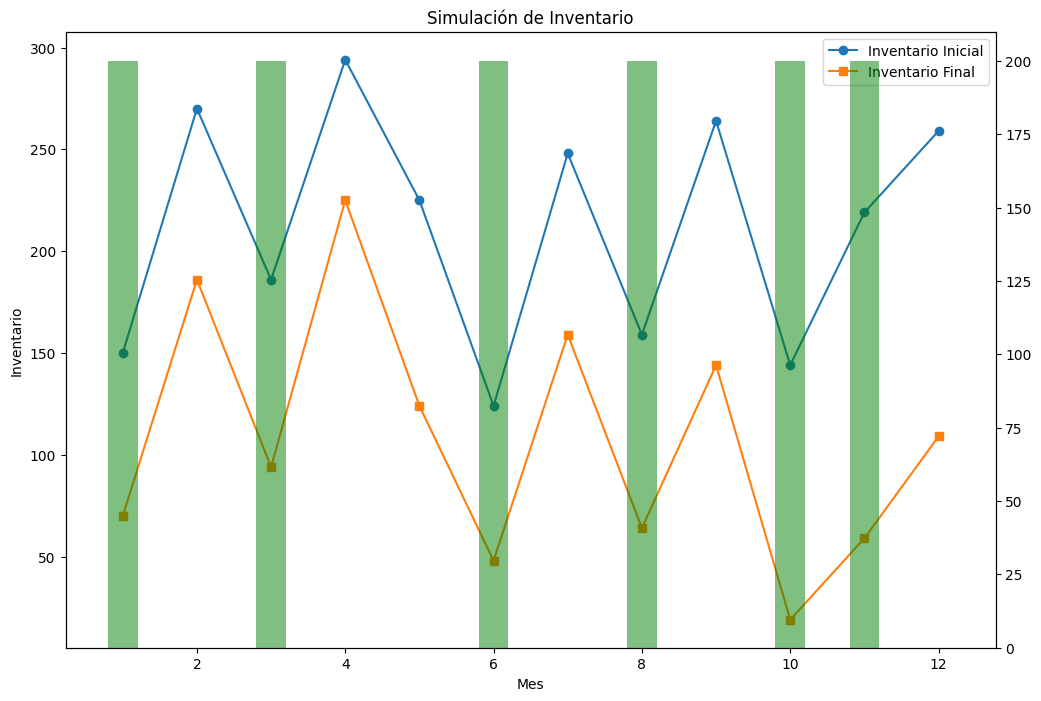

In [54]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
costos = {
    'ordenar': 100,
    'mantener': 20,
    'faltante': 50
}

distribucion_demanda = [50, 60, 70, 80, 90]
factores_estacionales = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1]

# Parámetros del inventario
R = 100  # Nivel de reorden
q = 200  # Cantidad a ordenar

# Datos iniciales
inventario_inicial = 150
num_aleatorios = [0.74022, 0.65741, 0.66083, 0.08355, 0.55121, 0.00911, 0.14060, 0.14845, 0.41839, 0.39685, 0.74416, 0.53152]

# Función para ajustar la demanda
def ajustar_demanda(num_aleatorio, mes):
    demanda_base = np.interp(num_aleatorio, [0, 1], [50, 90])  # Ajusta según la distribución empírica
    demanda_ajustada = demanda_base * factores_estacionales[mes - 1]
    return round(demanda_ajustada)

# Inicializar variables
meses = list(range(1, 13))
inventarios_iniciales = []
inventarios_finales = []
demandas_ajustadas = []
ordenes = []

inventario = inventario_inicial  # Definir inventario como variable entera

for mes in range(1, 13):
    inventarios_iniciales.append(inventario)

    num_aleatorio = num_aleatorios[mes - 1]
    demanda_ajustada = ajustar_demanda(num_aleatorio, mes)
    demandas_ajustadas.append(demanda_ajustada)

    inventario_final = inventario - demanda_ajustada
    inventario_final = max(0, inventario_final)
    inventarios_finales.append(inventario_final)

    # Decidir si hacer un pedido
    if inventario_final <= R:
        orden = q
        inventario_final += q
    else:
        orden = 0

    ordenes.append(orden)

    inventario = inventario_final  # Actualizar el inventario para el próximo mes

# Crear las gráficas
fig, ax1 = plt.subplots(figsize=(12, 8))

# Gráfica de inventario inicial y final
ax1.plot(meses, inventarios_iniciales, label='Inventario Inicial', marker='o')
ax1.plot(meses, inventarios_finales, label='Inventario Final', marker='s')

# Añadir etiquetas y título
ax1.set_xlabel('Mes')
ax1.set_ylabel('Inventario')
ax1.set_title('Simulación de Inventario')
ax1.legend()

# Crear un segundo eje para los pedidos
ax2 = ax1.twinx()
ax2.bar(meses, ordenes, color='green', alpha=0.5, label='Ordenes', width=0.4)

# Mostrar la gráfica
plt.show()

Aplicando el metodo de la transformada inversa como se nos solicita, obtenemos:

In [45]:
 # Definimos la función que asigna valores de demanda x según R
def demanda(R):
    if 0.000 <= R < 0.010:
        return 35
    elif 0.010 <= R < 0.025:
        return 36
    elif 0.025 <= R < 0.045:
        return 37
    elif 0.045 <= R < 0.065:
        return 38
    elif 0.065 <= R < 0.087:
        return 39
    elif 0.087 <= R < 0.110:
        return 40
    elif 0.110 <= R < 0.135:
        return 41
    elif 0.135 <= R < 0.162:
        return 42
    elif 0.162 <= R < 0.190:
        return 43
    elif 0.190 <= R < 0.219:
        return 44
    elif 0.219 <= R < 0.254:
        return 45
    elif 0.254 <= R < 0.299:
        return 46
    elif 0.299 <= R < 0.359:
        return 47
    elif 0.359 <= R < 0.424:
        return 48
    elif 0.424 <= R < 0.494:
        return 49
    elif 0.494 <= R < 0.574:
        return 50
    elif 0.574 <= R < 0.649:
        return 51
    elif 0.649 <= R < 0.719:
        return 52
    elif 0.719 <= R < 0.784:
        return 53
    elif 0.784 <= R < 0.844:
        return 54
    elif 0.844 <= R < 0.894:
        return 55
    elif 0.894 <= R < 0.934:
        return 56
    elif 0.934 <= R < 0.964:
        return 57
    elif 0.964 <= R < 0.980:
        return 58
    elif 0.980 <= R < 0.995:
        return 59
    elif 0.995 <= R < 1.000:
        return 60

# Generamos 100 valores aleatorios y calculamos sus demandas correspondientes
R_values = [random.random() for _ in range(1000)]
demand_values = [demanda(R) for R in R_values]

#Calculamos la media y la varianza
mean_demand = np.mean(demand_values)
var_demand = np.var(demand_values)

#Calculamos la media acumulativa para realizar la gràfica de convergencia
cumulative_mean = np.cumsum(demand_values) / (np.arange(1, len(demand_values) + 1))

In [ ]:
print(f'La media de la demanda es:{mean_demand}')
print(f'La varianza de la demanda es:{var_demand} ')

La media de la demanda es:48.811
La varianza de la demanda es:33.417279 


In [46]:
# Ordenamos los valores de R para una gráfica de función escalón
sorted_indices = np.argsort(R_values)
R_sorted = np.array(R_values)[sorted_indices]
demand_sorted = np.array(demand_values)[sorted_indices]

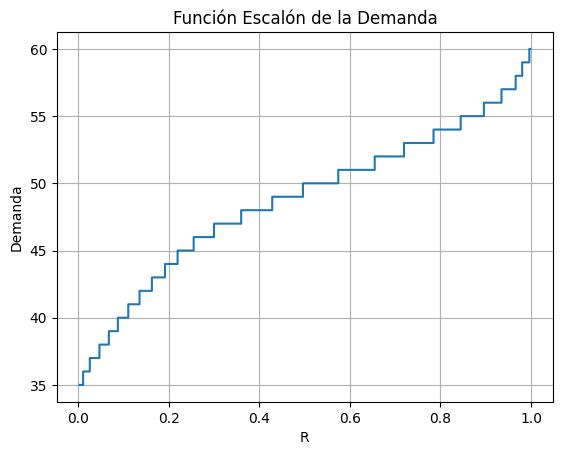

In [47]:
# Graficamos la función escalón
plt.step(R_sorted, demand_sorted, where='post')
plt.xlabel('R')
plt.ylabel('Demanda')
plt.title('Función Escalón de la Demanda')
plt.grid(True)
plt.show()

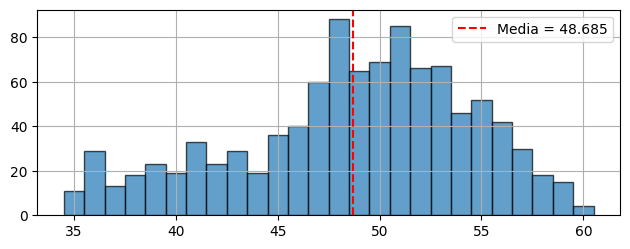

In [48]:
plt.subplot(2, 1, 2)
plt.hist(demand_values, bins=np.arange(34.5, 61.5, 1), edgecolor = 'black', alpha=0.7)
plt.axvline(x=mean_demand, color='r', linestyle='--', label=f'Media = {mean_demand}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

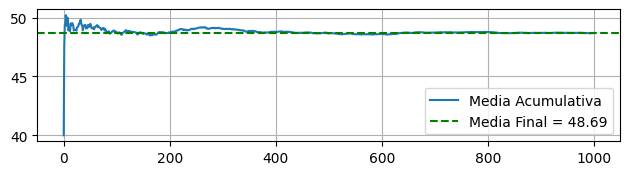

In [49]:
plt.subplot(3, 1, 3)
plt.plot(cumulative_mean, label='Media Acumulativa')
plt.axhline(y=mean_demand, color='green', linestyle= '--',label=f'Media Final = {mean_demand:.2f}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Una vez resuleto por simulación el ejemplo del inventario, podemos elaborar un codigo donde se encuentre la solución optima

In [50]:
# Parámetros iniciales
cost_order = 100
cost_inventory = 20
cost_shortage = 50

# Distribuciones empíricas
demanda_prob = [0.01, 0.015, 0.02, 0.02, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045, 0.065, 0.07, 0.075, 0.08]
demanda_val = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
tiempo_entrega_prob = [0.3, 0.4, 0.3]
tiempo_entrega_val = [1, 2, 3]
factores_estacionales = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]

# Normalizar la distribución de demanda_prob si es necesario
demanda_prob = np.array(demanda_prob)
demanda_prob /= demanda_prob.sum()

# Rango de búsqueda para q y R
q_values = range(100, 301, 50)
R_values = range(50, 201, 50)

cost_minimo = float('inf')
q_optimo = None
R_optimo = None

# Simulación
for q in q_values:
    for R in R_values:
        inventario_inicial = 150
        costo_ordenar_total = 0
        costo_inventario_total = 0
        costo_faltante_total = 0

        for mes in range(12):
            factor_estacional = factores_estacionales[mes]
            demanda_ajustada = np.random.choice(demanda_val, p=demanda_prob) * factor_estacional

            if inventario_inicial < demanda_ajustada:
                faltante = demanda_ajustada - inventario_inicial
                costo_faltante_total += faltante * cost_shortage
                inventario_final = 0
            else:
                faltante = 0
                inventario_final = inventario_inicial - demanda_ajustada

            if inventario_final <= R:
                tiempo_entrega = np.random.choice(tiempo_entrega_val, p=tiempo_entrega_prob)
                inventario_inicial = inventario_final + q
                costo_ordenar_total += cost_order

            costo_inventario_total += inventario_final * cost_inventory
            inventario_inicial = inventario_final

        costo_total = costo_ordenar_total + costo_inventario_total + costo_faltante_total

        if costo_total < cost_minimo:
            cost_minimo = costo_total
            q_optimo = q
            R_optimo = R

print(f'Cantidad óptima a ordenar (q): {q_optimo}')
print(f'Nivel óptimo de reorden (R): {R_optimo}')
print(f'Costo total mínimo: {cost_minimo}')


Cantidad óptima a ordenar (q): 100
Nivel óptimo de reorden (R): 200
Costo total mínimo: 23090.0
